# 1. Setting Up


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk import ConditionalFreqDist
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# 2. Loading the Dataset

We will be analyzing the dataset of the inaugural speeches by US presidents. Let's explore the dataset.

In [2]:
import nltk
nltk.download("inaugural")

from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


In [3]:
raw_data = []
for fileid in inaugural.fileids():
    raw_data.append([fileid, " ".join(inaugural.words(fileid))])
data = pd.DataFrame(raw_data, columns=["File ID", "Text"])
data

,File ID,Text
0,1789-Washington.txt,Fellow - Citizens of the Senate and of the Hou...
1,1793-Washington.txt,"Fellow citizens , I am again called upon by th..."
2,1797-Adams.txt,"When it was first perceived , in early times ,..."
3,1801-Jefferson.txt,Friends and Fellow Citizens : Called upon to u...
4,1805-Jefferson.txt,"Proceeding , fellow citizens , to that qualifi..."
5,1809-Madison.txt,Unwilling to depart from examples of the most ...
6,1813-Madison.txt,About to add the solemnity of an oath to the o...
7,1817-Monroe.txt,I should be destitute of feeling if I was not ...
8,1821-Monroe.txt,"Fellow citizens , I shall not attempt to descr..."
9,1825-Adams.txt,In compliance with an usage coeval with the ex...


# 2. Vectorize the Text

As we learnt in lecture, one way to vectorize text is using the [Term Frequency Inverse Document Frequency](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) (TF-IDF) featurizer.

In [7]:
vectorizer = TfidfVectorizer(max_df =0.95, min_df = 3, stop_words = 'english')
X = vectorizer.fit_transform(data['Text'])

Print the shape of your dataset. **Question**: What does each dimension stand for?

In [11]:
X.shape

(59, 3495)

In [13]:
words = vectorizer.get_feature_names_out()

Print the stop words. **Question**: Do you think this is a reasonable list of stopwords?

In [14]:
vectorizer.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

# 3. Running K-Means

We will now run k-means to cluster the dataset, using sklearn's [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Set `random_state=416`.

In [15]:
k = 5
kmeans = KMeans(n_clusters = k, random_state = 416)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=416)

For visualization purposes, let's add the cluster labels to the pandas dataframe.

In [16]:
data["Clusters k=%d" % k] = kmeans.labels_
data

,File ID,Text,Clusters k=5
0,1789-Washington.txt,Fellow - Citizens of the Senate and of the Hou...,0
1,1793-Washington.txt,"Fellow citizens , I am again called upon by th...",3
2,1797-Adams.txt,"When it was first perceived , in early times ,...",0
3,1801-Jefferson.txt,Friends and Fellow Citizens : Called upon to u...,0
4,1805-Jefferson.txt,"Proceeding , fellow citizens , to that qualifi...",3
5,1809-Madison.txt,Unwilling to depart from examples of the most ...,0
6,1813-Madison.txt,About to add the solemnity of an oath to the o...,0
7,1817-Monroe.txt,I should be destitute of feeling if I was not ...,0
8,1821-Monroe.txt,"Fellow citizens , I shall not attempt to descr...",0
9,1825-Adams.txt,In compliance with an usage coeval with the ex...,0


**Questions**: What trends do you observe? What underlying patterns might the clustering algorithm have picked up on?

To further analyze the clusters, let's print the most frequent words per cluster.

In [17]:
cluster_to_words_to_num_occurences = {}
for i in range(k):
    cluster_to_words_to_num_occurences[i] = {}
    for word in words:
        num_occurences = 0
        for _, text in data[(data["Clusters k=%d" % k] == i)]["Text"].iteritems():
            if word.lower() in text.lower().split(" "):
                num_occurences += 1
        cluster_to_words_to_num_occurences[i][word] = num_occurences

num_words = 10
for i in range(k):
    top_words = [(cluster_to_words_to_num_occurences[i][word], word) for word in cluster_to_words_to_num_occurences[i]]
    top_words.sort(reverse=True)
    print("Cluster %d: " % i, top_words[:num_words])

<ipython-input-17-87be9296336d>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, text in data[(data["Clusters k=%d" % k] == i)]["Text"].iteritems():


Cluster 0:  [(17, 'rights'), (17, 'public'), (17, 'country'), (17, 'citizens'), (16, 'world'), (16, 'union'), (16, 'support'), (16, 'states'), (16, 'state'), (16, 'power')]
Cluster 1:  [(6, 'years'), (6, 'world'), (6, 'way'), (6, 'united'), (6, 'time'), (6, 'stand'), (6, 'protect'), (6, 'president'), (6, 'new'), (6, 'national')]
Cluster 2:  [(11, 'world'), (11, 'shall'), (11, 'new'), (11, 'nation'), (11, 'men'), (11, 'great'), (10, 'work'), (10, 'time'), (10, 'life'), (10, 'know')]
Cluster 3:  [(12, 'shall'), (12, 'government'), (12, 'country'), (12, 'constitution'), (12, 'citizens'), (11, 'united'), (11, 'states'), (11, 'rights'), (11, 'public'), (11, 'political')]
Cluster 4:  [(13, 'world'), (13, 'war'), (13, 'today'), (13, 'time'), (13, 'life'), (13, 'hope'), (13, 'great'), (13, 'god'), (13, 'freedom'), (13, 'america')]


**Question**: What words are common across all clusters? What words are more unique to particular clusters?

**Question**: Why do the clusters not correspond to meaningful topics of words?

# 4. Selecting K

Sklearn's KMeans classifier's `inertia_` property returns the objective function, or quality, of the clustering.

**Question**: What would we expect the inertia to be when k=59?

In [18]:
ks = []
inertias = []
for k in range(1, 60, 2):
    # TODO: train a classifier with this k compute its quality
    ks.append(k)
    kmeans = KMeans(n_clusters = k).fit(X)
    inertias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Graph it out

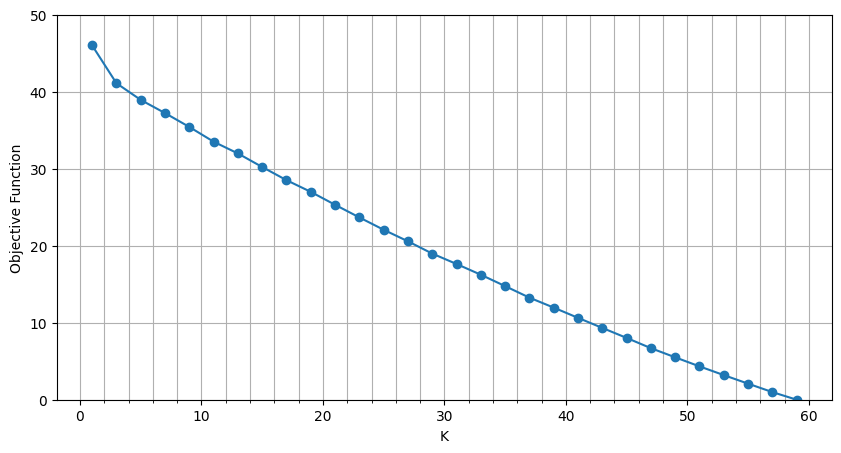

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ks, inertias, marker='o')
ax.set_ylim(0, 50)
ax.set_xlabel("K")
ax.set_ylabel("Objective Function")
ax.set_xticks(range(0, ks[-1], 2), minor=True)
ax.grid(which='both')

**Question**: What appears to be the best value of k?


# 5. (Bonus) Exploring the Data!

The below function takes in a list of words and graphs their occurance in presidents' speeches over the years. Use it to identify trends in the data!

In [20]:
def words_over_time(words):
    cfd = ConditionalFreqDist(
        (target, int(fileid[:4]))
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in words
        if w.lower().startswith(target))
    cfd.plot()

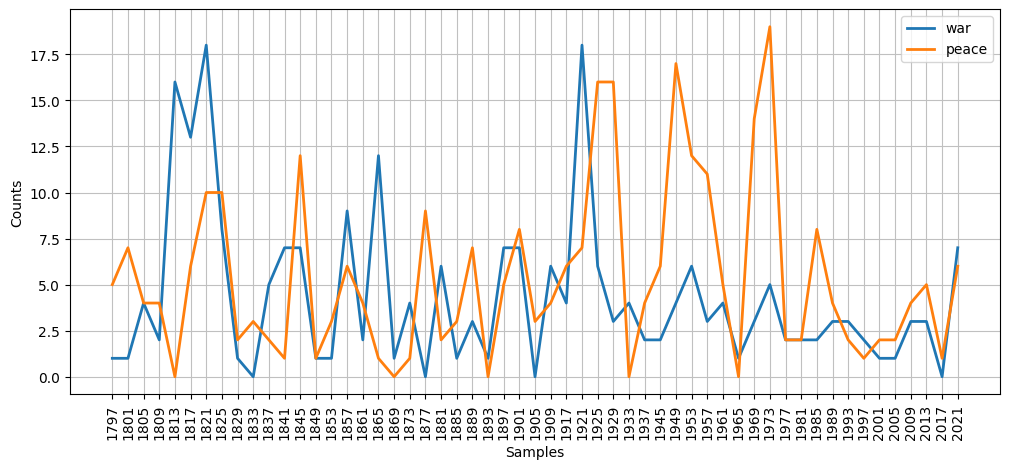

In [21]:
plt.figure(figsize=(12, 5))
words_over_time(["war", "peace"])